name: apeksha chavan
UID: 2017130013
BE COMPS
FCI Project

Diabetes is a disease that occurs when your blood glucose level, also called as blood sugar, is too high. 
Blood Sugar is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, 
helps glucose from food get into your cells to be used for energy. Overtime, having too much glucose in your blood can cause health problems.

Diabetes contribute to high blood pressure and is linked with high cholesterol which significantly increases the risk of heart attacks, 
strokes and other cardiovascular diseases. Diabetic Retinotherapy is caused by blood vessels in the back of the eye swelling and leaking leading
to eye problems and blindness. The kidneys are another organ that is at particular risk of damage as a result of diabetes and the risk is again
increased by poorly controlled diabetes, high blood pressure and high cholesterol. If diabetes has caused nerve damage, 
then this can lead to nausea, constipation or diorrhoea. Diabetes affect on the skin is usually a result of it's affect on the nerves
and circulation which can lead to dry skin; slow healing of cuts, burns and wounds, 
fungal and bacterial infection and the loss of feeling in the foot. 

Due to increase in diabetes cases worldwide and due to the overgrowing negligence of people towards this issue,
the medical industry is in need for predicting diabetes to control and create awareness among the patients to avoid fatal
health issues or even death in the years to come. With a proper data set and a trained machine learning model, 
doctors can predict whether a person is likely to have diabetes or long in the long run which will help them to take proper preliminary
 actions to avoid the worst.

We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We’ll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model. 

In [407]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old.

Pregnancies: Number of times pregnant

Glucose: The measurement of plasma glucose concentration for 2 hours in an oral glucose tolerance test.

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Obesity: Person is Obese or not (1: Overweight/obese 0: ideal weight)

Age: Age (years)

Outcome: Class variable (0 or 1)corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Data Description
We have our data saved in a CSV file called diabetes.csv. We first read our dataset into a pandas dataframe called diabetesDF, and then use the head() function to show the first five records from our dataset.

In [408]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Obesity,Age,Outcome
0,6,148,72,34,90,33.6,1,50,1
1,1,85,66,29,0,26.6,0,31,0
2,8,183,64,25,0,23.3,0,32,1
3,1,89,66,23,94,28.1,0,21,0
4,0,137,40,35,168,43.1,1,33,1


Let’s also make sure that our data is clean (has no null values, etc).
Note that the data does have some missing values (see Insulin = 0) in the samples in the previous figure. Ideally we could replace these 0 values with the mean value for that feature, but we’ll skip that for now.

In [409]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Obesity        768 non-null    int64  
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 54.1 KB


Data Exploration:




Let us now explore our data set to get a feel of what it looks like and get some insights about it.
Let’s start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.
In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

<AxesSubplot:>

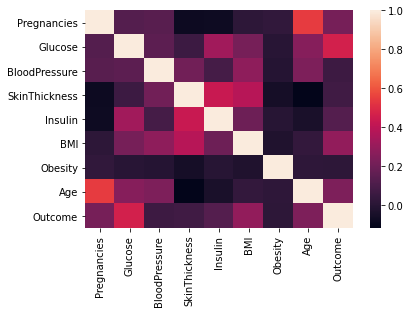

In [410]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Creating independent features


Next we will create our independent features from the new and changed dataset. 

In [411]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Obesity', 'Age']
predicted_class = ['Outcome']

Splitting Data into training and test data:



Next we will split the existing data into training and test data. We do this to train our machine learning model using the training data and test it's accuracy on the test data. We will be using train_test_split inbuilt function from scikit-learn for splitting the data array into two subsets. We use 80% of the split data as training data and 20% of it as test data.

In [412]:
X = diabetesDF[feature_columns].values
Y = diabetesDF[predicted_class].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.20, random_state=1)

If we carefully observe the data set, there are features with zero as their value. So in this scenario, the data is basically not captured since they are supposed to be having some value. In that case let us find out how many missing values are present with respect to all the features.

In [441]:
print("Number of rows missing Pregnancies:{0}".format(len(diabetesDF.loc[diabetesDF['Pregnancies']==0])))
print("Number of rows missing Glucose:{0}".format(len(diabetesDF.loc[diabetesDF['Glucose']==0])))
print("Number of rows missing Blood Pressure:{0}".format(len(diabetesDF.loc[diabetesDF['BloodPressure']==0])))
print("Number of rows missing Skin Thickness:{0}".format(len(diabetesDF.loc[diabetesDF['SkinThickness']==0])))
print("Number of rows missing Insulin:{0}".format(len(diabetesDF.loc[diabetesDF['Insulin']==0])))
print("Number of rows missing BMI:{0}".format(len(diabetesDF.loc[diabetesDF['BMI']==0])))
print("Number of rows missing Obesity:{0}".format(len(diabetesDF.loc[diabetesDF['Obesity']==0])))
print("Number of rows missing Age:{0}".format(len(diabetesDF.loc[diabetesDF['Age']==0])))

Number of rows missing Pregnancies:111
Number of rows missing Glucose:5
Number of rows missing Blood Pressure:35
Number of rows missing Skin Thickness:225
Number of rows missing Insulin:373
Number of rows missing BMI:11
Number of rows missing Obesity:641
Number of rows missing Age:0


Using Imputation function



Next we have to apply an imputation function and the imputation function here works on the strategy of mean. First step

is to import the Imputer from sklearn.preprocessing. 

In Imputer, wherever there are missing values as zero, we will apply the strategy of mean with respect to that particular feature to try and replace it.

In [414]:
#Imp = imputer(missing_values='NaN',strategy='median',axis=1)
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=np.nan, strategy='mean')
#new = imputer.fit_transform(diabetesDF.values.reshape(1,-1))

Next we are going to fit and transform our X_train and  X_test.

In [415]:
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

Building and Training a Machine Learning Model



Next we are going to build a machine learning model which is going to make our predictions after we train our model with the training data and test its accuracy with the test data. 



We will be using Random Forest Classifier. 



Random Forest Classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from  different decision trees to decide the final class of the test object. First let us import it from sklearn.ensemble and then we will assign it to a variable called 'model'.

In [416]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)

Next we will train this model using our training dataset. Training the model is very important as it will determine the outcome of it's prediction.We use the fit() function to fit in both X_train and Y_train.

In [417]:
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

 Testing the accuracy of the Trained Model


In [418]:
#testing loaded model to make prediction
model.fit(X_train,Y_train)
model.score(X_train,Y_train)
accuracyModel = model.score(X_train,Y_train)
print("accuracy of trained model = ",accuracyModel * 100,"%")

accuracy of trained model =  98.0456026058632 %


 Testing the accuracy of the Machine Learning Model



Since our model has been trained using the training data, we will now test the accuracy of the model on the test data. But firs let us fit our test data to our model.

In [419]:
#testing loaded model to make prediction
model.fit(X_test,Y_test)
model.score(X_test,Y_test)
accuracyModel = model.score(X_test,Y_test)
print("accuracy of tested model = ",accuracyModel * 100,"%")


accuracy of tested model =  99.35064935064936 %


Our model has got an accuracy of 99.35% i.e the model was successful in predicting whether the given person is likely to have diabetes or not. Our model has performed the best to our expectations. This model can be successfully used to make predictions on the data we provide to it.



Let us use the predict() function to see the predictions it makes with the test data.

In [420]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

Where 0 is the prediction that the person is likely to have diabetes and 1 is the prediction that the person is NOT likely to have diabetes.

Making Predictions



Since we have an accuracy of 99.35% from our model, we will use it to make real life predictions providing some data of our own. We will use the predict() function again for our model to predict whether the person with this data is likely to have diabetes or not.

In [451]:
x_demo=[[0,111,45,23,25,28,35,21]]
if model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Person is likely to NOT have diabetes


My model has successfully predicted that the person with the above data is likely to NOT have diabetes in the years to come.Now let us give some different data and see if how it predicts based on the new data given.

Let's test another case for a person being diabetic: as glucose level, age, pregnancies, & BMI are the major factors to determine diabetes we'll see major changes in these here.

In [452]:
x_demo=[[5,210,81,60,129,35,66,50]]
if model.predict(x_demo)==0:
    print("Person is likely to NOT have diabetes")
else:
    print("Person is likely to have diabetes")

Person is likely to have diabetes


My  model has successfully predicted that the person with the above data is likely to have diabetes so it is very important for that person to take good care about his health and take advise from his doctor on his future medications.

Conclusion:

We can draw the following conclusions:-



Glucose level, BMI, pregnancies and Age have significant influence on the model, specially glucose level and BMI. 
higher blood pressure is correlated with a person not being diabetic. 

Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. 

The performance metrics used in the evaluation are:
Accuracy Score: proportion of correct predictions out of the whole dataset. 

In this project, the Random Forest Classifer model has achieved a accuracy score of 99% in test data, 
i.e. out of all diabetic patients, 99% of them will be correctly classified using medical diagnostic measurements.